In [0]:
import pandas as pd
import re
df = pd.read_csv('/content/final.csv')

In [480]:
df.head()

,Year,Body,Injury,Severity,Position,Height (in cm),Wingspan (in cm),Standing Reach (in cm),Weight (in lb),Body Fat (%),Age,EndSeasonYear,Minutes,USG%,Games_Played,Fouls,Turnovers,Points,FT,3P,Steals,Assists,Offensive_Reb,Defensive_Reb
0,2012,knee,sore,dnp,C-F,208.3,223.5,280.7,252.0,5.3%,29,2012,31.763889,15.8,72.0,3.194444,1.652778,10.347222,2.013889,0.000000,0.555556,0.583333,3.194444,6.305556
1,2012,knee,torn,indefinitely,F-G,200.7,218.4,268.0,210.0,6.0%,32,2013,23.046512,20.7,43.0,2.116279,1.232558,8.651163,1.744186,0.209302,0.744186,1.162791,0.906977,2.767442
2,2019,ankle,sprained,dtd,G,190.5,203.2,250.2,190.0,4.6%,30,2019,19.250000,25.6,16.0,0.875000,1.750000,9.812500,2.187500,0.375000,0.187500,1.625000,0.625000,1.187500
3,2014,back,injury,dnp,F-C,210.8,NaN,NaN,240.0,NaN,37,2014,29.735294,24.5,68.0,2.264706,1.617647,14.764706,2.323529,0.029412,1.147059,2.338235,1.102941,6.691176
4,2017,back,sore,dtd,F-C,213.4,221.0,281.9,240.0,6.3%,24,2018,18.946667,19.7,75.0,1.960000,0.920000,8.146667,1.346667,0.000000,0.706667,1.066667,1.133333,3.386667


In [0]:
# create a corpus of words that should go in each category/column'
#take the top 10 body parts and try to predict those

# body  = "leg foot metatarsal neck spinal cord finger abdominal hand/finger fifth thigh knees finger pinky ribs bone foot knee adductor acl shin back nerve ligament labrum elbow plantar achilles tendon hand head sinus thumb ankle hamstring wrist stomach midfoot arm joint tooth hip groin skin blood tonsils lungs toenail eyelid collarbone gluteus oral jaw toe heart patella shoulder calf chest eye triceps oblique mouth pelvis ear tissue nose hamstring quadriceps meniscus flexor rib abdomen forearm"
# injury_type = "mononucleosis fractured hernia bulging disc gastroenteritis synovitis sore/sprained arthroscopic hernia turf bruise illness surgery partially sore sprained strained rest dislocated inflammation bruised fasciitis hyperextended spasms concussion tendinitis flu fracture stress infection virus tightness herniated torn soreness cold pain dizziness injury bonchitis laceration fatigue stiffness clots abrasion upset splits fragment microfracture contusion irritation broken swelling ailment headache "

body = "knee ankle back foot hamstring shoulder groin calf hip wrist" #, achilles, toe, elbow, hand, acl
injury_type = "sore sprained strained injury surgery bruised torn fractured spasms tendinitis"

severity = "dtd season indefinitely rest dnp"
#remove these injury logs bc they dont relate to gameplay or resting
take_out_these_players = "illness flu-like symptoms bronchitis"
body = body.split()
injury_type = injury_type.split()
severity = severity.split()

def bodetize(tokens):
    tokens = tokens.split(",")
    bodies = []
    for x in tokens:
        x = re.sub(r'\W+', '', x)
        if x in body:
            bodies.append(x)
    return bodies

def severetize(tokens):
  tokens = tokens.split(",")
  severities = []
  for x in tokens:
    x = re.sub(r'\W+', '', x)
    if x in severity:
      severities.append(x)
  return severities
  
def injury(tokens):
  tokens = tokens.split(",")
  injuries = []
  for x in tokens:
    x = re.sub(r'\W+', '', x)
    if x in injury_type:
      injuries.append(x)
  return injuries



In [0]:
# # create function put_body where it looks thru the tokenized notes column and returns an array of body parts for that row
# df["Body"] = df.apply(lambda row: bodetize(row['Tokenized Notes']), axis=1)
# df["Injury"] = df.apply(lambda row: injury(row['Tokenized Notes']), axis=1)
# df["Severity"] = df.apply(lambda row: severetize(row['Tokenized Notes']), axis=1)

# #should i remove the rows that are rest?

In [483]:
df.dtypes

Year                        int64
Body                       object
Injury                     object
Severity                   object
Position                   object
Height (in cm)            float64
Wingspan (in cm)          float64
Standing Reach (in cm)    float64
Weight (in lb)            float64
Body Fat (%)               object
Age                         int64
EndSeasonYear               int64
Minutes                   float64
USG%                      float64
Games_Played              float64
Fouls                     float64
Turnovers                 float64
Points                    float64
FT                        float64
3P                        float64
Steals                    float64
Assists                   float64
Offensive_Reb             float64
Defensive_Reb             float64
dtype: object

In [0]:
# for exporting a cleaned up csv
# from google.colab import files

# df2.to_csv('df.csv', index=False)
# files.download('df.csv')

In [0]:
df['Injury'] = df['Injury'].astype(str)
df['Body'] = df['Body'].astype(str)
df['Severity'] = df['Severity'].astype(str)

In [486]:
# check out the most common words in the notes on the injuries
from collections import Counter
from string import punctuation

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

stoplist = set(stopwords.words('english') + list(punctuation))

texts = df['Body'].str.lower() #see the top words in each column...

word_counts = Counter(word_tokenize('\n'.join(texts)))
# knee, ankle, back, foot, hamstring, shoulder, groin, calf, hip, wrist#, achilles, toe, elbow, hand, acl
# injury = sore sprained strained injury surgery bruised torn fractured spasms tendinitis
word_counts.most_common()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('knee', 1112),
 ('ankle', 761),
 ('back', 369),
 ('hamstring', 277),
 ('foot', 256),
 ('shoulder', 216),
 ('groin', 195),
 ('calf', 174),
 ('hip', 154),
 ('wrist', 106)]

In [487]:
#shuffles up the df
df = df.sample(frac=1)

df.head()

,Year,Body,Injury,Severity,Position,Height (in cm),Wingspan (in cm),Standing Reach (in cm),Weight (in lb),Body Fat (%),Age,EndSeasonYear,Minutes,USG%,Games_Played,Fouls,Turnovers,Points,FT,3P,Steals,Assists,Offensive_Reb,Defensive_Reb
2062,2017,knee,injury,dtd,F,200.7,213.4,261.6,233.0,6.7%,36,2017,17.918919,13.4,74.0,1.743243,0.581081,5.540541,0.783784,0.891892,0.445946,0.797297,0.202703,1.527027
386,2016,knee,sore,dtd,G,195.6,207.0,252.7,220.0,6.5%,25,2016,26.041667,20.1,24.0,2.791667,1.750000,9.333333,1.041667,0.958333,1.250000,3.250000,0.916667,2.458333
46,2011,knee,sore,dnp,C,215.9,NaN,NaN,255.0,NaN,31,2011,22.700000,10.3,30.0,3.166667,1.300000,4.100000,1.100000,0.000000,0.266667,0.266667,2.400000,5.533333
2691,2012,wrist,sprained,dnp,F,208.3,214.6,270.5,250.0,NaN,30,2012,24.571429,24.6,35.0,2.800000,1.314286,11.314286,2.314286,0.085714,0.600000,1.342857,2.085714,4.714286
710,2016,groin,sore,dtd,G-F,198.1,207.0,264.2,220.0,NaN,33,2016,23.567568,14.2,74.0,2.000000,0.810811,7.364865,1.108108,0.986486,0.756757,1.121622,0.418919,2.337838


In [0]:
# export this df, top ten injury type and body parts, length of 3684 rows...pretty solid, no null values...
df2 = df[df['Body']!="[]"]
df2 = df2[df2['Injury']!="[]"]

In [0]:
df2 = df2[~df2.Body.str.contains(",")]
df2 = df2[~df2.Injury.str.contains(",")]

In [490]:
len(df2)

3473

In [0]:
# to get rid of all the unwanted string stuff
df2['Body'] = df2['Body'].map(lambda x: x.strip('[]\'\'').rstrip('aAbBcC'))

In [492]:
df2.head(10)

,Year,Body,Injury,Severity,Position,Height (in cm),Wingspan (in cm),Standing Reach (in cm),Weight (in lb),Body Fat (%),Age,EndSeasonYear,Minutes,USG%,Games_Played,Fouls,Turnovers,Points,FT,3P,Steals,Assists,Offensive_Reb,Defensive_Reb
2062,2017,knee,injury,dtd,F,200.7,213.4,261.6,233.0,6.7%,36,2017,17.918919,13.4,74.0,1.743243,0.581081,5.540541,0.783784,0.891892,0.445946,0.797297,0.202703,1.527027
386,2016,knee,sore,dtd,G,195.6,207.0,252.7,220.0,6.5%,25,2016,26.041667,20.1,24.0,2.791667,1.750000,9.333333,1.041667,0.958333,1.250000,3.250000,0.916667,2.458333
46,2011,knee,sore,dnp,C,215.9,NaN,NaN,255.0,NaN,31,2011,22.700000,10.3,30.0,3.166667,1.300000,4.100000,1.100000,0.000000,0.266667,0.266667,2.400000,5.533333
2691,2012,wrist,sprained,dnp,F,208.3,214.6,270.5,250.0,NaN,30,2012,24.571429,24.6,35.0,2.800000,1.314286,11.314286,2.314286,0.085714,0.600000,1.342857,2.085714,4.714286
710,2016,groin,sore,dtd,G-F,198.1,207.0,264.2,220.0,NaN,33,2016,23.567568,14.2,74.0,2.000000,0.810811,7.364865,1.108108,0.986486,0.756757,1.121622,0.418919,2.337838
292,2014,ankle,sprained,dnp,F,200.7,200.7,256.5,209.0,10.0%,25,2014,22.086957,20.5,23.0,1.260870,1.000000,9.391304,1.391304,1.130435,0.608696,1.086957,0.652174,2.434783
574,2015,shoulder,injury,dtd,F-C,208.3,227.3,274.3,253.0,7.9%,22,2016,36.102941,27.8,68.0,2.073529,1.397059,24.352941,5.455882,0.014706,1.470588,2.191176,2.544118,7.691176
821,2012,groin,strained,dnp,G,190.5,203.2,250.2,190.0,4.6%,23,2012,37.358025,32.2,81.0,1.679012,3.432099,25.012346,5.876543,1.580247,1.049383,7.691358,1.000000,3.074074
2495,2012,back,strained,dnp,G,190.5,203.2,250.2,190.0,4.6%,23,2012,37.358025,32.2,81.0,1.679012,3.432099,25.012346,5.876543,1.580247,1.049383,7.691358,1.000000,3.074074
3067,2018,knee,sore,dtd,C-F,213.4,NaN,NaN,250.0,NaN,24,2019,30.349206,33.4,63.0,3.317460,3.714286,22.936508,5.698413,1.047619,0.634921,3.158730,2.269841,8.682540


In [0]:
# df2 = pd.get_dummies(df2)

In [0]:
# df2 = df2.drop(["Date", "Team", "Notes", "Player", "Tokenized Notes", "Player_Identifier"], axis = 1)

#How are body parts getting injured?

In [0]:
# now readding the body part injured to the df for some correlation analysis...
body_injury_df = pd.DataFrame() 

In [0]:
y = pd.get_dummies(df2['Body']) 
x = pd.get_dummies(df2['Injury']) 
# z = pd.get_dummies(df2['Position']) 
#add position dummetized into here

body_injury_df = pd.concat([body_injury_df, y], axis = 1)
body_injury_df = pd.concat([body_injury_df, x], axis = 1)
# body_injury_df = pd.concat([body_injury_df, z], axis = 1)



In [497]:
body_injury_df.head()

,ankle,back,calf,foot,groin,hamstring,hip,knee,shoulder,wrist,bruised,fractured,injury,sore,spasms,sprained,strained,surgery,tendinitis,torn
2062,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
386,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
46,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2691,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
710,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


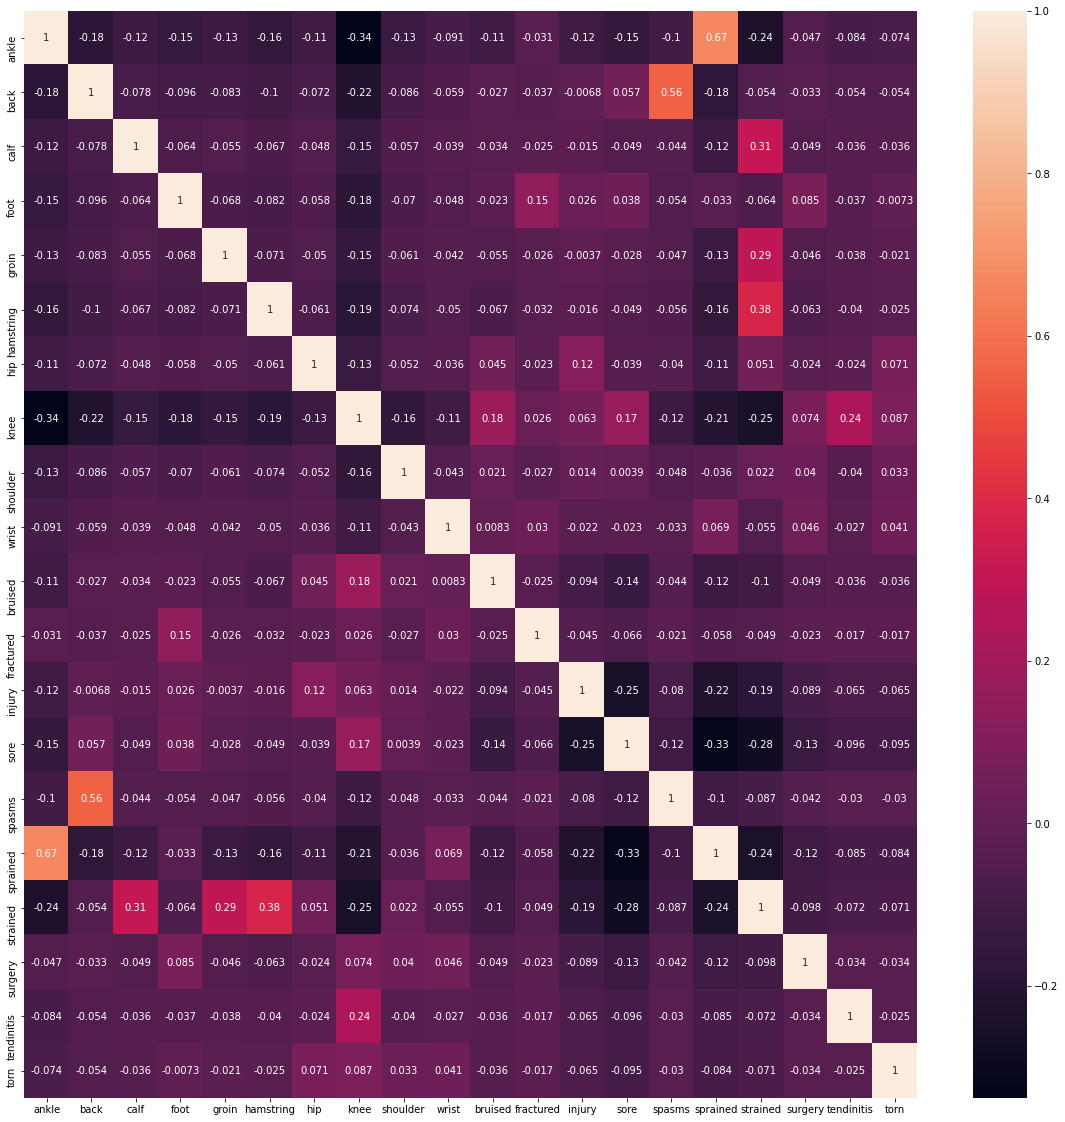

In [498]:
import seaborn as sn
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,20))   
sn.heatmap(body_injury_df.corr(), annot=True, ax=ax)
plt.show()

#Dummy Model

In [515]:
import sklearn
from sklearn import metrics
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

#for the plot of all the algorithms at the end
results_injury = []

feature_cols = ['Year', 'Age', 'Minutes','USG%', 'Points', "Height (in cm)", "Weight (in lb)", "Steals", "Defensive_Reb", "Turnovers"]
df2 = df2.sample(frac=1) # shuffle the DF
X = df2[feature_cols] # Features
# to change the t
y = df2.Body # Target variable
# y = df2.Injury # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
dummy_clf = sklearn.dummy.DummyClassifier(strategy='stratified') # same distribution as the dataset
dummy_clf.fit(X_train, y_train)

# DummyClassifier(strategy='most_frequent')
y_pred = dummy_clf.predict(X_test)
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
print("Everything: \n", metrics.classification_report(y_test, y_pred, digits=3))
# print(roc_auc_score(y_test, y_pred, average='micro'))
results_injury.append(sklearn.metrics.f1_score(y_test, y_pred, average='micro'))

# # hard to label this confusion matrix
# print(metrics.confusion_matrix(y_test, y_pred))

Misclassified samples: 856
Everything: 
               precision    recall  f1-score   support

       ankle      0.239     0.265     0.251       223
        back      0.125     0.107     0.115       122
        calf      0.042     0.036     0.039        55
        foot      0.071     0.069     0.070        72
       groin      0.029     0.039     0.033        51
   hamstring      0.080     0.081     0.081        86
         hip      0.086     0.068     0.076        44
        knee      0.299     0.280     0.289       314
    shoulder      0.091     0.096     0.093        52
       wrist      0.061     0.087     0.071        23

    accuracy                          0.179      1042
   macro avg      0.112     0.113     0.112      1042
weighted avg      0.181     0.179     0.179      1042



#Naive Bayes

In [500]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,y_train)

#Predict Output
y_pred= model.predict(X_test) # 0:Overcast, 2:Mild
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
print("Everything: \n", metrics.classification_report(y_test, y_pred, digits=3))
results_injury.append(sklearn.metrics.f1_score(y_test, y_pred, average='micro'))

# # hard to label this confusion matrix
# print(metrics.confusion_matrix(y_test, y_pred))

Misclassified samples: 827
Everything: 
               precision    recall  f1-score   support

       ankle      0.233     0.553     0.327       219
        back      0.207     0.176     0.190       102
        calf      0.000     0.000     0.000        57
        foot      0.194     0.146     0.167        82
       groin      0.062     0.106     0.079        47
   hamstring      0.484     0.160     0.240        94
         hip      0.095     0.047     0.062        43
        knee      0.213     0.103     0.139       310
    shoulder      0.059     0.057     0.058        53
       wrist      0.175     0.200     0.187        35

    accuracy                          0.206      1042
   macro avg      0.172     0.155     0.145      1042
weighted avg      0.207     0.206     0.179      1042



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Logistic Regression

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [502]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
train_img = scaler.transform(X_train)
test_img = scaler.transform(X_test)
model = LogisticRegression(solver = 'lbfgs')
model.fit(train_img, y_train)
# use the model to make predictions with the test data
y_pred = model.predict(test_img)
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Everything: \n", metrics.classification_report(y_test, y_pred, digits=3))
results_injury.append(sklearn.metrics.f1_score(y_test, y_pred, average='micro'))

# # hard to label this confusion matrix
# print(metrics.confusion_matrix(y_test, y_pred))

Misclassified samples: 728


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Everything: 
               precision    recall  f1-score   support

       ankle      0.228     0.201     0.214       219
        back      0.394     0.127     0.193       102
        calf      0.000     0.000     0.000        57
        foot      0.444     0.049     0.088        82
       groin      0.231     0.064     0.100        47
   hamstring      0.333     0.011     0.021        94
         hip      0.000     0.000     0.000        43
        knee      0.315     0.803     0.452       310
    shoulder      0.000     0.000     0.000        53
       wrist      0.000     0.000     0.000        35

    accuracy                          0.301      1042
   macro avg      0.195     0.125     0.107      1042
weighted avg      0.256     0.301     0.212      1042



#KNN Classifier

In [0]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [504]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Everything: \n", metrics.classification_report(y_test, y_pred, digits=3))
results_injury.append(sklearn.metrics.f1_score(y_test, y_pred, average='micro'))

# # hard to label this confusion matrix
# print(metrics.confusion_matrix(y_test, y_pred))

Misclassified samples: 493
Accuracy: 0.5268714011516314
Everything: 
               precision    recall  f1-score   support

       ankle      0.430     0.676     0.526       219
        back      0.423     0.431     0.427       102
        calf      0.500     0.421     0.457        57
        foot      0.530     0.427     0.473        82
       groin      0.540     0.574     0.557        47
   hamstring      0.557     0.415     0.476        94
         hip      0.409     0.209     0.277        43
        knee      0.675     0.629     0.651       310
    shoulder      0.515     0.321     0.395        53
       wrist      0.688     0.314     0.431        35

    accuracy                          0.527      1042
   macro avg      0.527     0.442     0.467      1042
weighted avg      0.542     0.527     0.522      1042



#Decision Tree

In [0]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn import tree

In [0]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [507]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
print("Everything: \n", metrics.classification_report(y_test, y_pred, digits=3))
results_injury.append(sklearn.metrics.f1_score(y_test, y_pred, average='micro'))

# # hard to label this confusion matrix
# print(metrics.confusion_matrix(y_test, y_pred))

Misclassified samples: 440
Everything: 
               precision    recall  f1-score   support

       ankle      0.539     0.598     0.567       219
        back      0.450     0.490     0.469       102
        calf      0.542     0.561     0.552        57
        foot      0.579     0.537     0.557        82
       groin      0.526     0.638     0.577        47
   hamstring      0.684     0.574     0.624        94
         hip      0.412     0.326     0.364        43
        knee      0.676     0.674     0.675       310
    shoulder      0.551     0.509     0.529        53
       wrist      0.440     0.314     0.367        35

    accuracy                          0.578      1042
   macro avg      0.540     0.522     0.528      1042
weighted avg      0.579     0.578     0.577      1042



#Random Forest

In [514]:
from sklearn.ensemble import RandomForestClassifier
# Create the model with 100 trees
clf = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
clf = clf.fit(X_train, y_train)

# Actual class predictions
y_pred = clf.predict(X_test)
# Probabilities for each class
rf_probs = clf.predict_proba(X_test)[:, 1]
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {} out of {}'.format(count_misclassified, len(y_test)))
print("Everything: \n", metrics.classification_report(y_test, y_pred, digits=3))
results_injury.append(sklearn.metrics.f1_score(y_test, y_pred, average='micro'))

# hard to label this confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

Misclassified samples: 414 out of 1042
Everything: 
               precision    recall  f1-score   support

       ankle      0.514     0.607     0.557       214
        back      0.684     0.456     0.547       114
        calf      0.661     0.685     0.673        54
        foot      0.672     0.577     0.621        78
       groin      0.759     0.667     0.710        66
   hamstring      0.606     0.642     0.623        67
         hip      0.515     0.340     0.410        50
        knee      0.595     0.728     0.655       302
    shoulder      0.667     0.431     0.523        65
       wrist      0.750     0.375     0.500        32

    accuracy                          0.603      1042
   macro avg      0.642     0.551     0.582      1042
weighted avg      0.614     0.603     0.598      1042

[[130   7   3   8   3   5   4  49   5   0]
 [ 18  52   3   2   4   2   2  28   1   2]
 [  3   0  37   3   0   0   4   7   0   0]
 [ 17   2   0  45   1   0   0  11   2   0]
 [  5   1   2   

random forests are better than a single decision tree, makes sense!

#Feature Importance

In [509]:
from sklearn.ensemble import RandomForestClassifier
# load dataset
df2 = df2.sample(frac=1) # shuffle it
feature_cols = ['Age', 'Minutes','USG%', 'Points', "Height (in cm)", "Weight (in lb)", "Games_Played", "Turnovers", "FT", "3P"]


X = df2[feature_cols] # Features
y = df2.Body # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=feature_cols).sort_values(ascending=False)
feature_imp

Age               0.117291
FT                0.116278
Minutes           0.113928
Turnovers         0.107946
Points            0.103897
USG%              0.102900
Games_Played      0.094245
3P                0.093088
Weight (in lb)    0.088605
Height (in cm)    0.061822
dtype: float64

based on this, we see weight and height dont predict what body part is likely to get injured, while minutes, FT, and age are the top three indicators

#Plotting Model Results

In [510]:
#names
names = ["Dummy", "Naive Bayes", "Logistic", "KNN", "DTree", "Random Forrest"]

#results
print(results_injury)

[0.29750479846449135, 0.20633397312859886, 0.30134357005758156, 0.5268714011516314, 0.5777351247600768, 0.5978886756238004]


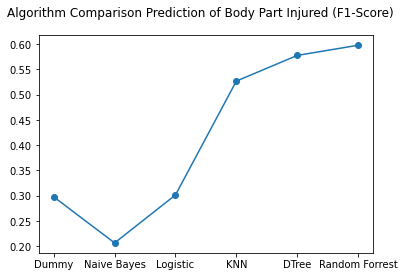

In [511]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison Prediction of Body Part Injured (F1-Score)')
plt.scatter(names,results_injury)
plt.plot(names,results_injury)

plt.show()